# Análisis de Relaciones y Dependencias del CoE contra otros indicadores
## 2018

intervalo de confianza

In [ ]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carga de datos
df_2018 = pd.read_csv('2018_data.csv')
df_2018 = df_2018.drop('Unnamed: 0', axis=1)
df_2018 = df_2018.iloc[:-1, :]
df_2018.head()

,Nombre,Codigo,Partic en\nIndice Prec Y Cotiz,CoE,CARBON,Beta,Ln B/M,Lev,OIStd,EFdev,ROA,IND,YD 2022,YD 2021,YD 2020,YD 2019,YD 2018
0,Fomento Econ Mex,FEMSAUBD,10.020,0.0934,3.3200,0.848,1.0362,0.4178,0.00816,0.120899,0.05621,1.0,0.0,0.0,0.0,0.0,1.0
1,America Movil,AMXB,8.890,0.2526,11.3228,0.772,1.4497,0.8280,0.01969,0.201411,0.03668,0.0,0.0,0.0,0.0,0.0,1.0
2,GMexico,GMEXICOB,8.850,0.1737,7.6005,1.131,0.2807,0.4746,0.03505,0.167937,0.06407,1.0,0.0,0.0,0.0,0.0,1.0
3,Wal Mart de Mexico,WALMEX,8.430,0.0864,1.8447,0.806,1.6660,0.4620,0.01927,0.014419,0.12448,0.0,0.0,0.0,0.0,0.0,1.0
4,Cemex,CEMEXCPO,6.710,0.2587,176.7534,1.286,-0.2815,0.6027,0.01478,0.104979,0.01973,1.0,0.0,0.0,0.0,0.0,1.0


Primero, se hará un diagrama de dispersión de la variable objetivo **CoE** contra las demás variables independientes que son los indicadores de las 32 empresas que estamos analizando.  
Donde usamos diagramas de dispersión ya que estos permiten representar la relación entre dos variables cuantitativas mediante puntos en un plano cartesiano. Este tipo de gráfico es especialmente útil para identificar patrones, tendencias o posibles correlaciones entre las variables, ya sean positivas, negativas o inexistentes.

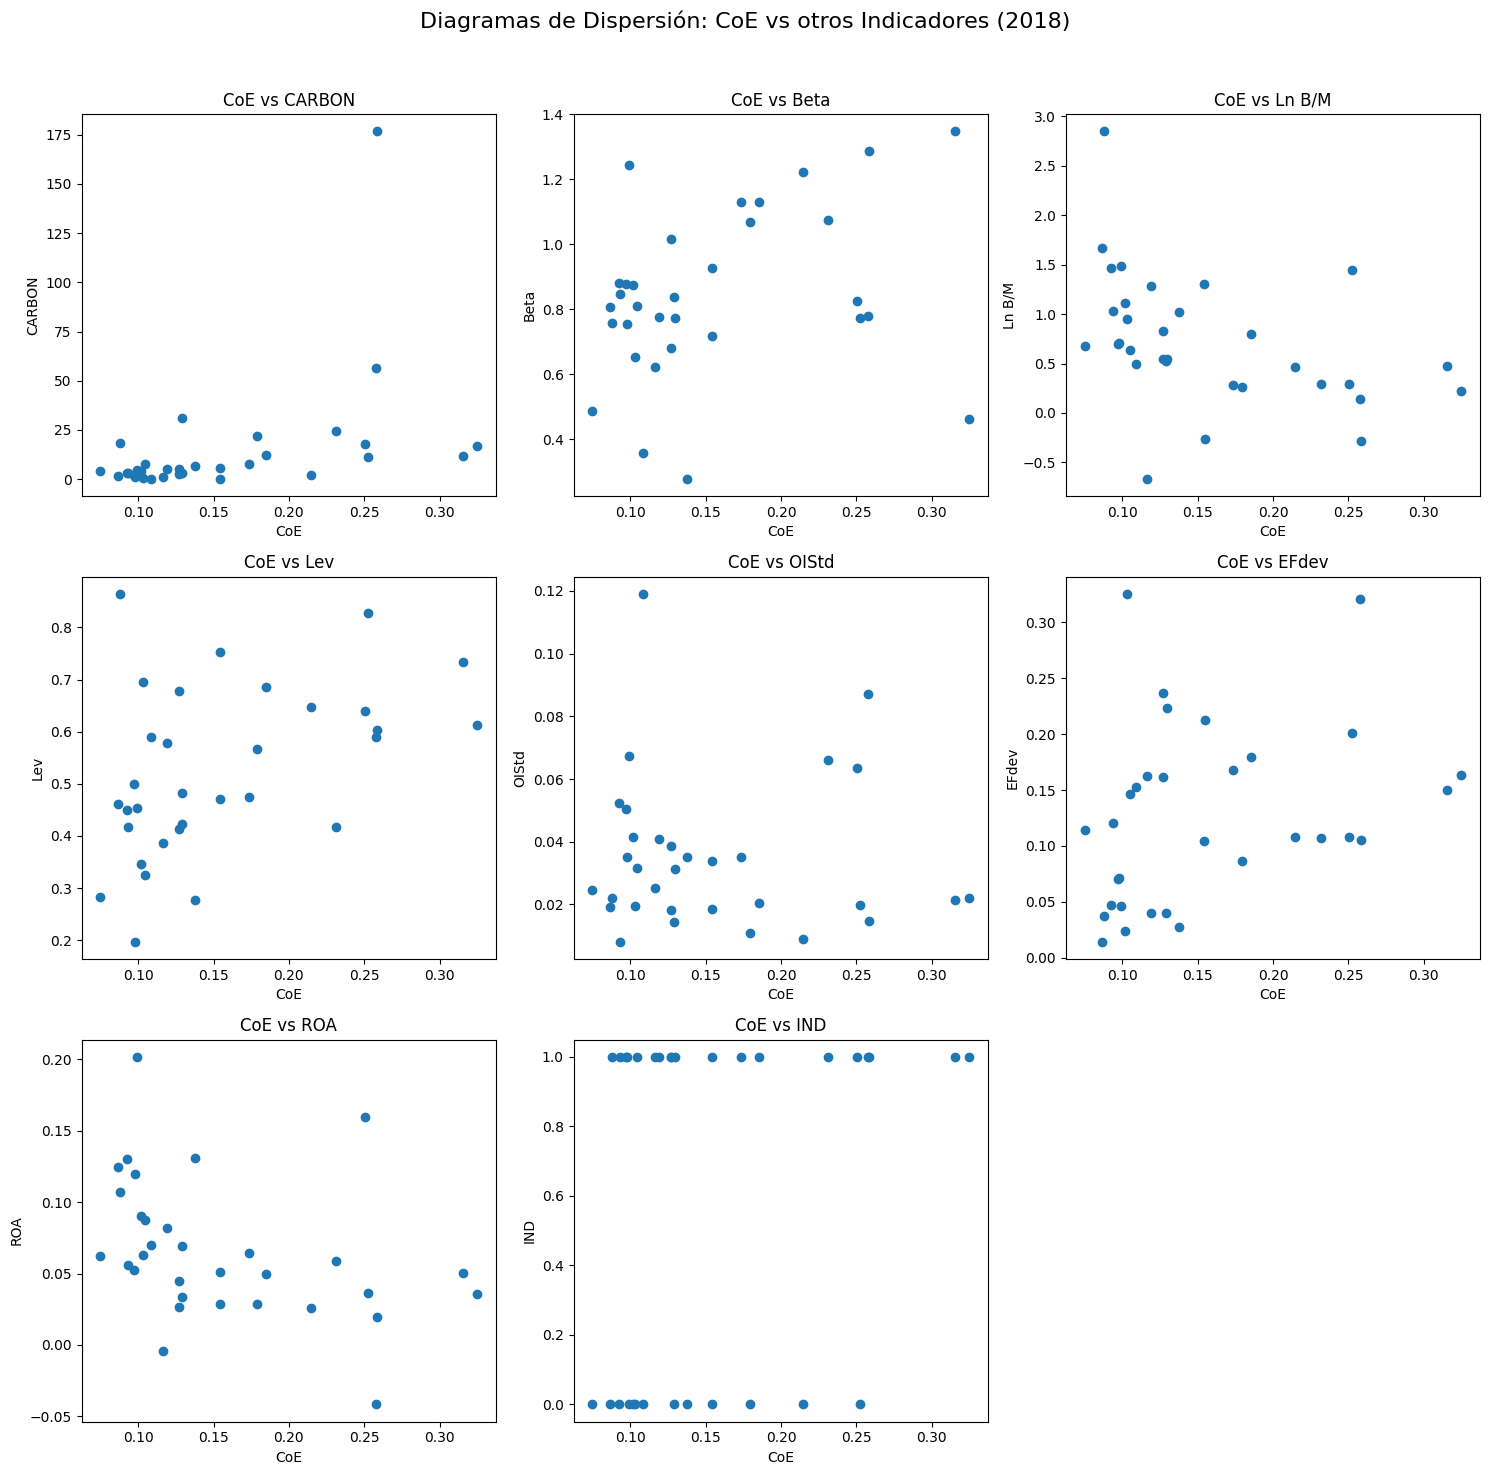

In [ ]:
# Asigna la columna base para los diagramas de dispersión
x = df_2018.iloc[:, 3]

# Configura la figura y los subplots en una cuadrícula de 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Diagramas de Dispersión: CoE vs otros Indicadores (2018)', fontsize=16)

# Recorre las columnas 4 a 12 para crear cada subplot
for i, ax in enumerate(axes.flat):
    if i < 8:  # Solo hay 8 columnas en el rango 4:12
        y = df_2018.iloc[:, i + 4]
        ax.scatter(x, y)
        ax.set_title(f'CoE vs {df_2018.columns[i + 4]}')
        ax.set_xlabel(f'{df_2018.columns[3]}')
        ax.set_ylabel(f'{df_2018.columns[i + 4]}')
    else:
        ax.axis('off')  # Apaga cualquier subplot adicional

# Ajusta el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Como se puede observar, no existe alguna correlación clara entre los indicadores y la variable objetivo CoE.  

A continuación se procederá a hacer un análisis de la importancia de las variables, tanto con un enfoque lineal como no lineal.

Para el enfoque lineal nos basaremos en el cálculo de la **correlación** entre las variables independientes y la variable objetivo. Donde la correlación entre dos variables \( X \) y \( Y \) se calcula utilizando el **coeficiente de correlación de Pearson**:

$$
r = \frac{\sum (X_i - \bar{X})(Y_i - \bar{Y})}{\sqrt{\sum (X_i - \bar{X})^2 \cdot \sum (Y_i - \bar{Y})^2}}
$$

Donde:
- $ X_i $ y $ Y_i $ son los valores individuales de las variables.
- $ \bar{X} $ y $ \bar{Y} $ son las medias de $ X $ y $ Y $, respectivamente.
- $ r $ toma valores entre -1 y 1:
  - $ r = 1 $: Relación perfectamente positiva.
  - $ r = -1 $: Relación perfectamente negativa.
  - $ r = 0 $: Sin relación lineal.


Posteriormente se realizará una ordenación por magnitud según el valor absoluto de su correlación, priorizando aquellas con mayor relación (positiva o negativa) con la variable objetivo. Esto se basa en la idea de que características con una correlación más fuerte aportan más información relevante.

Es importante mencionar que este método solo mide relaciones lineales. Si la relación es no lineal, el coeficiente de Pearson puede ser engañoso ya que no contempla interacciones entre múltiples variables, solo analiza la relación bivariada entre cada característica y la columna objetivo.

In [ ]:
# Enfoque lineal: A partir de la correlación
# Calcula la correlación de cada característica con la columna objetivo
correlation = df_2018.iloc[:, 4:12].corrwith(df_2018.iloc[:, 3])

# Ordena las características según la magnitud de su correlación
#correlation = correlation.abs().sort_values(ascending=False)
correlation = correlation.sort_values(ascending=False)
print("Correlación de las características con la variable objetivo:")
print(correlation)


Correlación de las características con la variable objetivo:
Lev       0.453569
CARBON    0.427212
EFdev     0.312917
Beta      0.312606
IND       0.265723
OIStd    -0.029688
ROA      -0.379053
Ln B/M   -0.419630
dtype: float64


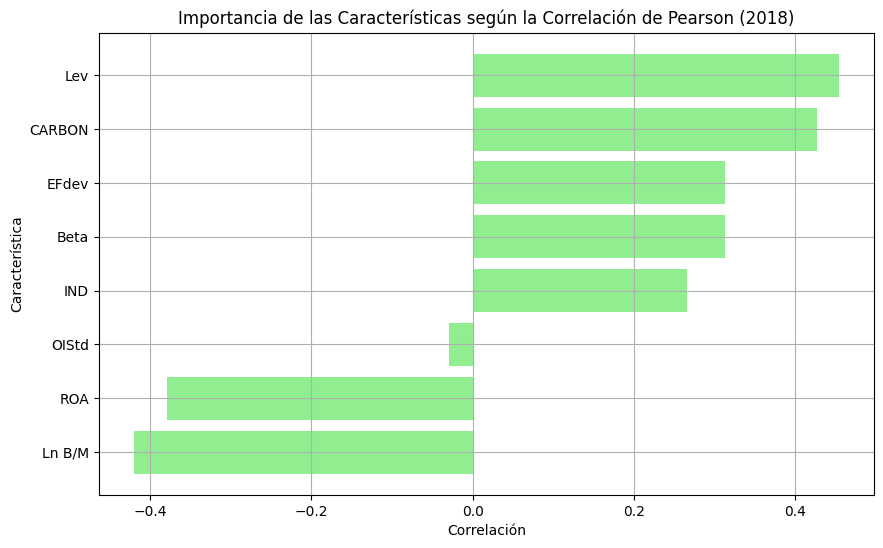

In [ ]:
# Graficar la importancia de las características según la correlación
plt.figure(figsize=(10, 6))
plt.barh(correlation.index, correlation.values, color='lightgreen')
plt.xlabel('Correlación')
plt.ylabel('Característica')
plt.title('Importancia de las Características según la Correlación de Pearson (2018)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características con mayor correlación aparezcan primero
plt.grid('True')
plt.show()

In [ ]:
X = df_2018.iloc[:-1, 4:12]

y = df_2018.iloc[:-1, 3]

Ahora, para el enfoque no lineal utilizaremos el regresor basado en Random Forest, donde el criterio utilizado es el **Error Cuadrático Medio (MSE, por sus siglas en inglés)**. Este criterio se basa en minimizar la varianza dentro de los nodos resultantes después de una división.

Donde, para un nodo $ N $ con un conjunto de datos $ S $, la medida de impureza para regresión es la **varianza** de los valores objetivo $ y $:

$$
\text{Varianza}(N) = \frac{1}{|S|} \sum_{i \in S} (y_i - \bar{y})^2
$$

Donde:
- $ y_i $: Valor objetivo de la instancia $ i $.
- $ \bar{y} $: Promedio de los valores objetivo en $ S $.
- $ |S| $: Número de instancias en $ S $.

Al dividir el nodo $ N $ en dos subconjuntos $ S_L $ y $ S_R $, el **Error Cuadrático Medio (MSE)** evalúa la calidad de la división:

$$
\text{MSE} = \frac{|S_L|}{|S|} \cdot \text{Varianza}(S_L) + \frac{|S_R|}{|S|} \cdot \text{Varianza}(S_R)
$$

- La división seleccionada minimiza este valor de MSE, es decir, busca reducir la varianza dentro de los subconjuntos.


---

### **Importancia de las Características**

La importancia de una característica $ X_i $ se calcula evaluando cuánto reduce esta la varianza (criterio MSE) en los nodos donde es utilizada. Matemáticamente:

$$
\text{Importancia}(X_i) = \sum_{t \in \text{nodos donde } X_i \text{ es usado}} \frac{|S_t|}{|S|} \Delta \text{Varianza}_t
$$

Donde:
- $ S_t $: Tamaño del subconjunto de datos en el nodo $ t $.
- $ \Delta \text{Varianza}_t $: Reducción de la varianza en el nodo $ t $ al usar $ X_i $ como criterio de división.


In [ ]:
# Enfoque no lineal: Random Forest
from sklearn.ensemble import RandomForestRegressor


# Entrena un modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extrae la importancia de las características
feature_importances = model.feature_importances_

# Crea un DataFrame para mostrar la importancia
importance_df = pd.DataFrame({'Característica': X.columns, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

print("Importancia de las características según el modelo de Random Forest:")
print(importance_df)


Importancia de las características según el modelo de Random Forest:
  Característica  Importancia
0         CARBON     0.320145
2         Ln B/M     0.306569
1           Beta     0.119083
3            Lev     0.100310
6            ROA     0.074726
5          EFdev     0.045402
4          OIStd     0.030082
7            IND     0.003684


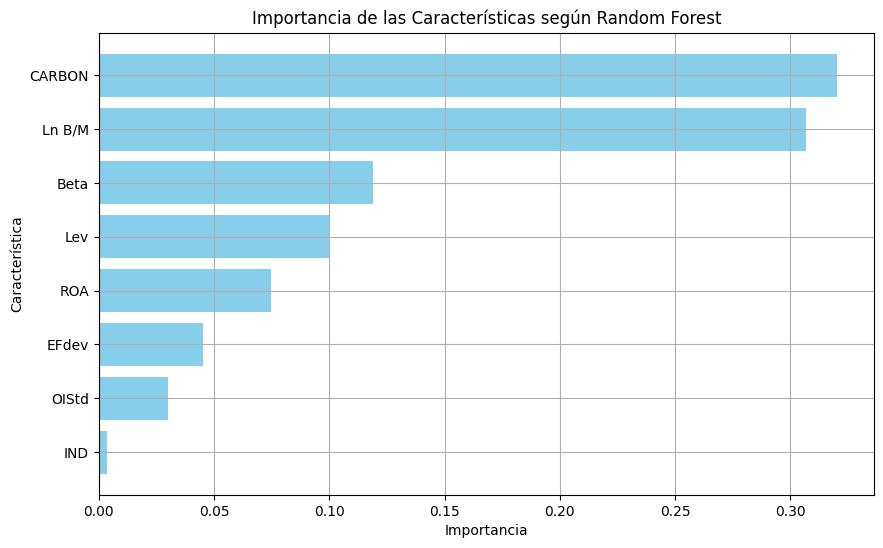

In [ ]:
# Gráfica de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características según Random Forest')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes aparezcan primero
plt.grid('True')
plt.show()


A pesar de que puede diferir el orden entre ambas caracterizaciones de la importancia, notamos que el índice Carbón es de los más relevantes para el CoE.

# 2019
Se hace un análisis análogo para el comportamiento de este año

In [ ]:
# Carga de datos
df_2019 = pd.read_csv('2019_data.csv')
df_2019 = df_2019.drop('Unnamed: 0', axis=1)
df_2019 = df_2019.iloc[:-1, :]
df_2019.head()

,Nombre,Codigo,Partic en\nIndice Prec Y Cotiz,CoE,CARBON,Beta,Ln B/M,Lev,OIStd,EFdev,ROA,IND,YD 2022,YD 2021,YD 2020,YD 2019,YD 2018
0,Fomento Econ Mex,FEMSAUBD,10.020,0.0873,2.2461,0.814,1.1133,0.4891,0.00901,0.075191,0.04866,1.0,0.0,0.0,0.0,1.0,0.0
1,America Movil,AMXB,8.890,0.2541,15.2960,0.766,1.6482,0.8519,0.01686,0.118718,0.04920,0.0,0.0,0.0,0.0,1.0,0.0
2,GMexico,GMEXICOB,8.850,0.1451,6.3235,1.218,0.4982,0.4731,0.02873,0.057590,0.09442,1.0,0.0,0.0,0.0,1.0,0.0
3,Wal Mart de Mexico,WALMEX,8.430,0.0847,2.3112,0.615,1.7269,0.5184,0.02401,0.032699,0.12364,0.0,0.0,0.0,0.0,1.0,0.0
4,Cemex,CEMEXCPO,6.710,0.1771,171.1803,1.619,-0.4970,0.6314,0.01149,0.137049,0.00610,1.0,0.0,0.0,0.0,1.0,0.0


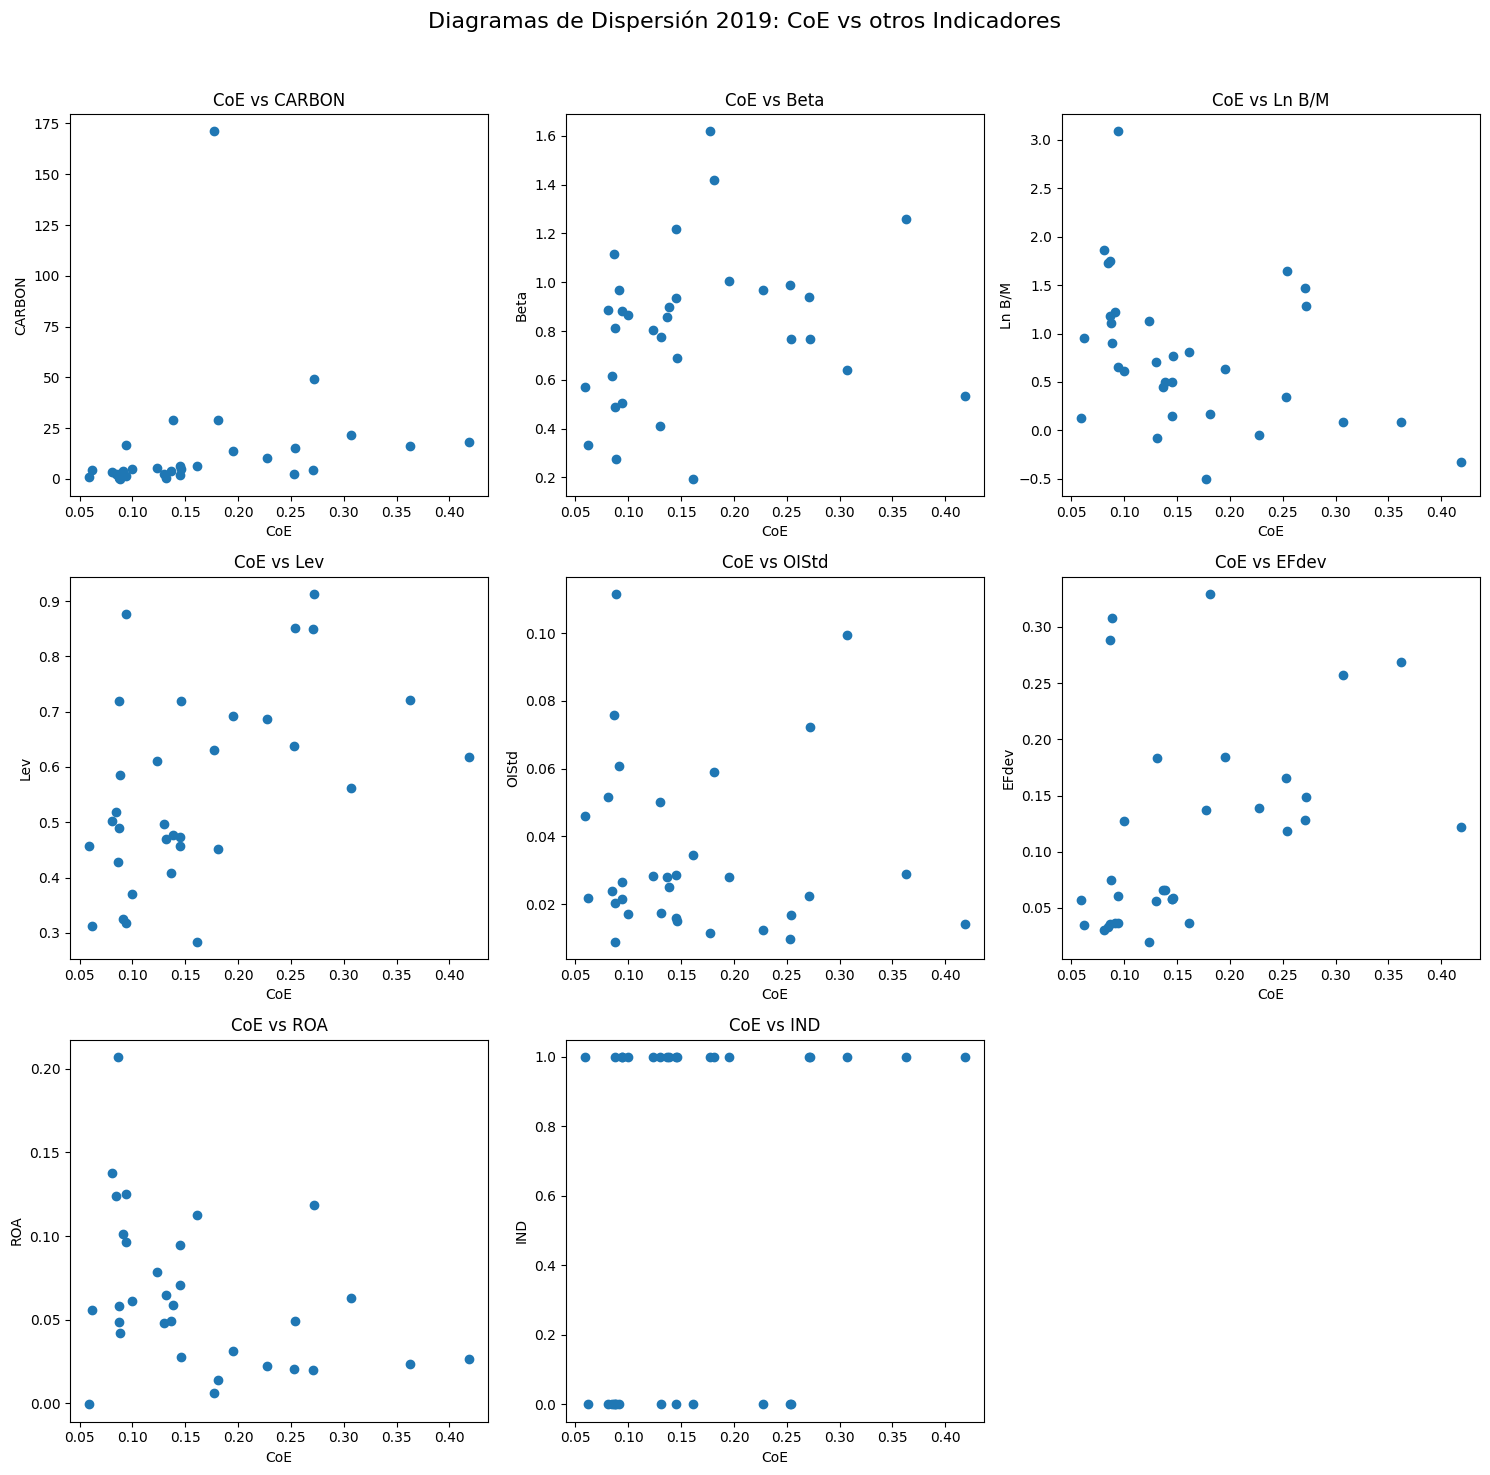

In [ ]:
# Diagramas de dispersión
# Asigna la columna base para los diagramas de dispersión
x = df_2019.iloc[:, 3]

# Configura la figura y los subplots en una cuadrícula de 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Diagramas de Dispersión 2019: CoE vs otros Indicadores', fontsize=16)

# Recorre las columnas 4 a 12 para crear cada subplot
for i, ax in enumerate(axes.flat):
    if i < 8:  # Solo hay 8 columnas en el rango 4:12
        y = df_2019.iloc[:, i + 4]
        ax.scatter(x, y)
        ax.set_title(f'CoE vs {df_2019.columns[i + 4]}')
        ax.set_xlabel(f'{df_2019.columns[3]}')
        ax.set_ylabel(f'{df_2019.columns[i + 4]}')
    else:
        ax.axis('off')  # Apaga cualquier subplot adicional

# Ajusta el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Enfoque lineal: A partir de la correlación
# Calcula la correlación de cada característica con la columna objetivo
correlation = df_2019.iloc[:, 4:12].corrwith(df_2019.iloc[:, 3])

# Ordena las características según la magnitud de su correlación
correlation = correlation.sort_values(ascending=False)
print("Correlación de las características con la variable objetivo:")
print(correlation)

Correlación de las características con la variable objetivo:
Lev       0.499182
EFdev     0.407740
IND       0.254570
CARBON    0.213958
Beta      0.206590
OIStd    -0.053548
ROA      -0.366488
Ln B/M   -0.387465
dtype: float64


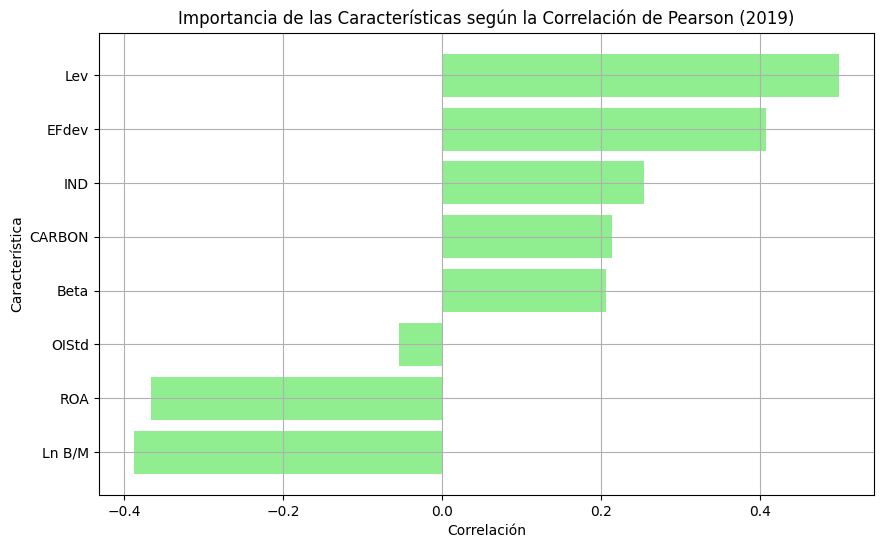

In [ ]:
# Graficar la importancia de las características según la correlación
plt.figure(figsize=(10, 6))
plt.barh(correlation.index, correlation.values, color='lightgreen')
plt.xlabel('Correlación')
plt.ylabel('Característica')
plt.title('Importancia de las Características según la Correlación de Pearson (2019)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características con mayor correlación aparezcan primero
plt.grid('True')
plt.show()

Pero podemos notar que en magnitud, las correlaciones lineales de CoE contra otros índices aumentó para el año 2019

In [ ]:
# Enfoque no lineal: Random Forest
from sklearn.ensemble import RandomForestRegressor
X = df_2019.iloc[:-1, 4:12]
y = df_2019.iloc[:-1, 3]

# Entrena un modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extrae la importancia de las características
feature_importances = model.feature_importances_

# Crea un DataFrame para mostrar la importancia
importance_df = pd.DataFrame({'Característica': X.columns, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

print("Importancia de las características según el modelo de Random Forest:")
print(importance_df)


Importancia de las características según el modelo de Random Forest:
  Característica  Importancia
0         CARBON     0.191453
2         Ln B/M     0.186653
6            ROA     0.177460
3            Lev     0.168974
5          EFdev     0.139477
1           Beta     0.079397
4          OIStd     0.046859
7            IND     0.009727


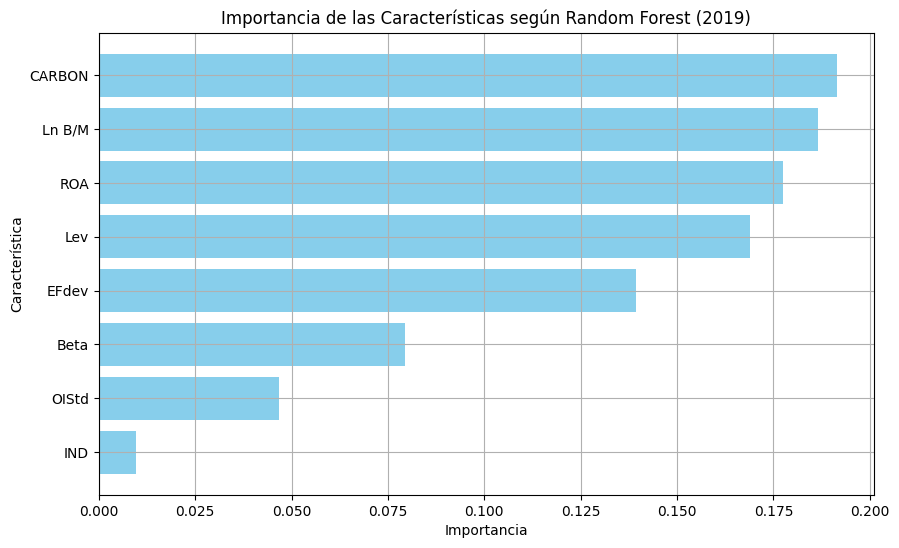

In [ ]:
# Gráfica de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características según Random Forest (2019)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes aparezcan primero
plt.grid('True')
plt.show()

# 2020

In [ ]:
# Carga de datos
df_2020 = pd.read_csv('2020_data.csv')
df_2020 = df_2020.drop('Unnamed: 0', axis=1)
df_2020 = df_2020.iloc[:-1, :]
df_2020.head()

,Nombre,Codigo,Partic en\nIndice Prec Y Cotiz,CoE,CARBON,Beta,Ln B/M,Lev,OIStd,EFdev,ROA,IND,YD 2022,YD 2021,YD 2020,YD 2019,YD 2018
0,Fomento Econ Mex,FEMSAUBD,10.020,0.0890,1.9240,0.881,0.9989,0.5515,0.00996,0.360455,0.00589,1.0,0.0,0.0,1.0,0.0,0.0
1,America Movil,AMXB,8.890,0.2420,12.2676,0.734,1.6049,0.8421,0.01594,0.495250,0.03331,0.0,0.0,0.0,1.0,0.0,0.0
2,GMexico,GMEXICOB,8.850,0.1397,6.9191,1.055,0.8399,0.4572,0.03163,0.117182,0.09538,1.0,0.0,0.0,1.0,0.0,0.0
3,Wal Mart de Mexico,WALMEX,8.430,0.0786,2.0893,0.480,1.7544,0.5327,0.02764,0.074654,0.09575,0.0,0.0,0.0,1.0,0.0,0.0
4,Cemex,CEMEXCPO,6.710,0.0932,162.6749,1.518,-0.0608,0.6736,0.01022,1.178522,-0.05199,1.0,0.0,0.0,1.0,0.0,0.0


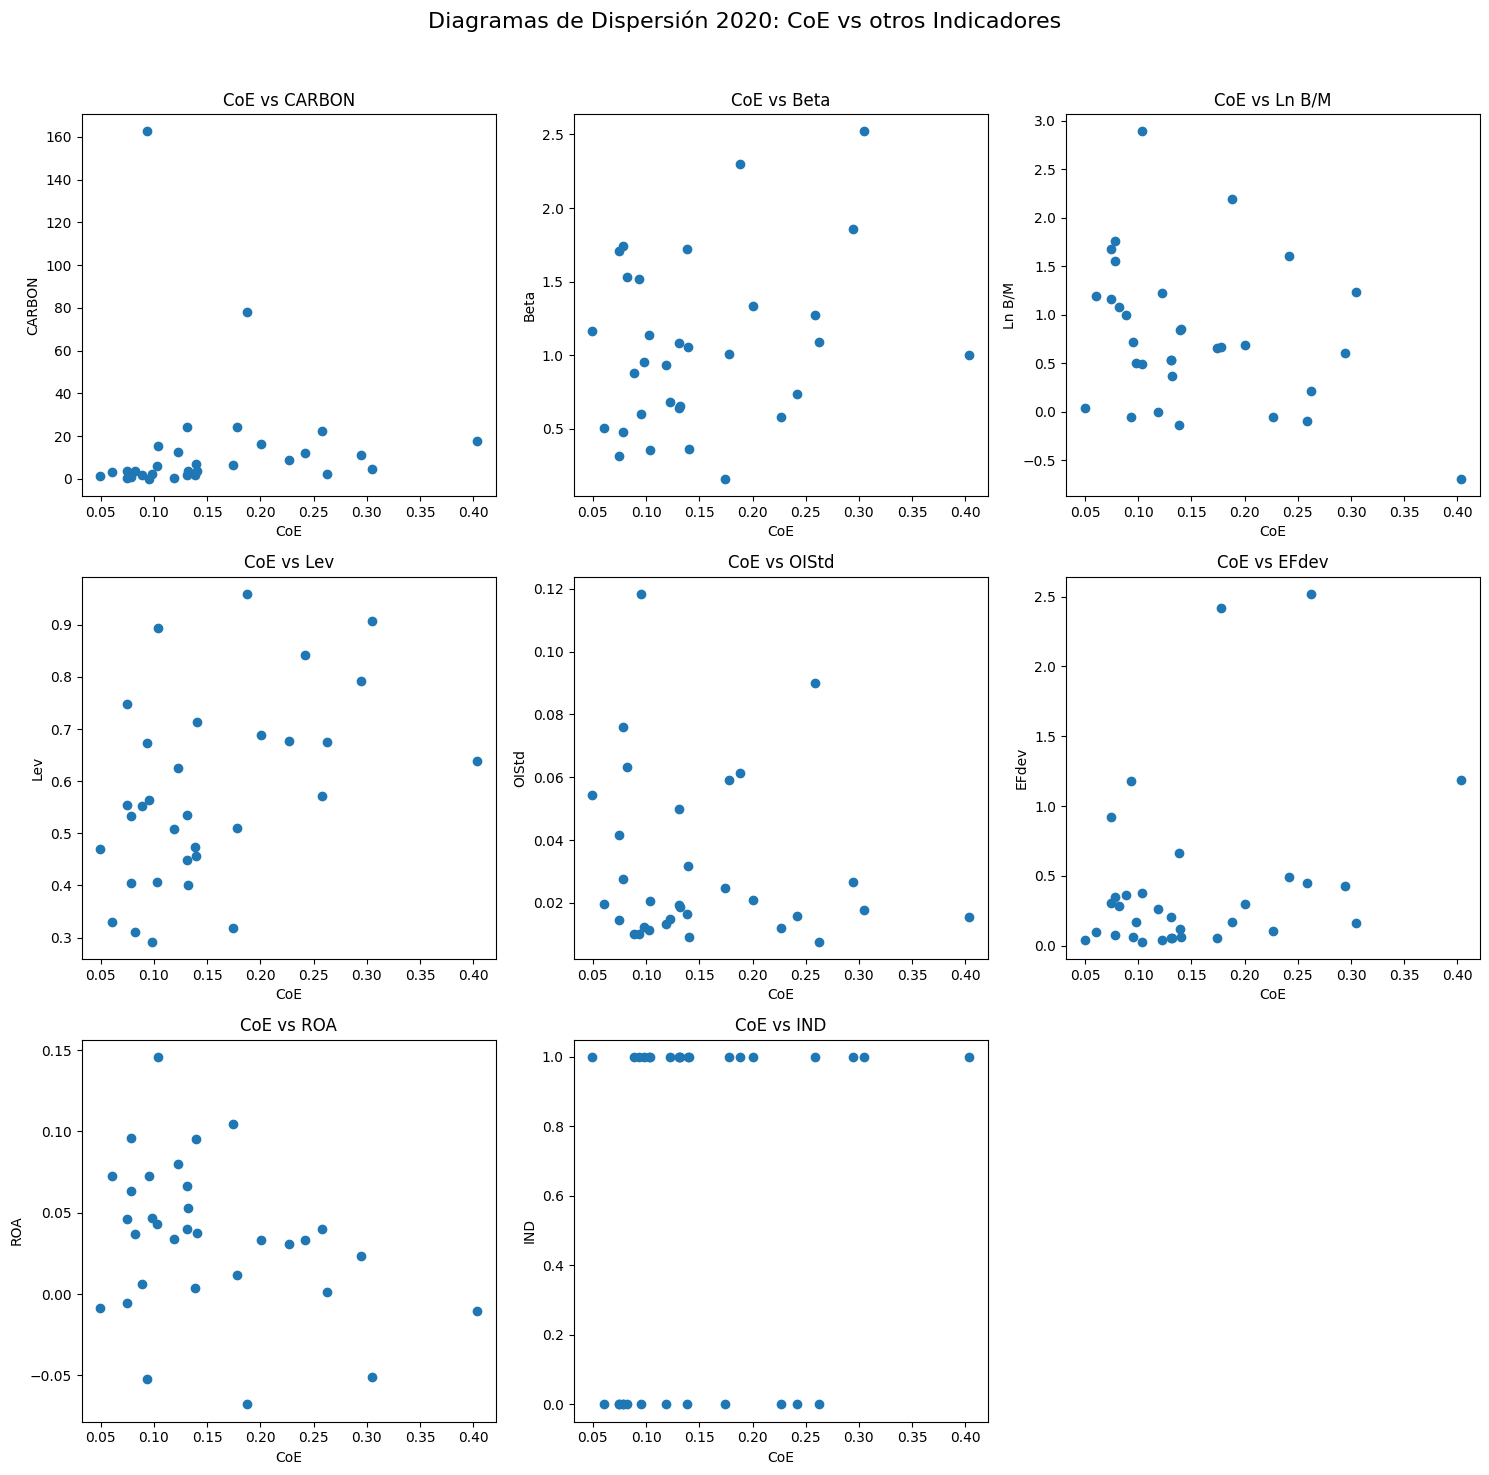

In [ ]:
# Diagramas de dispersión
# Asigna la columna base para los diagramas de dispersión
x = df_2020.iloc[:, 3]

# Configura la figura y los subplots en una cuadrícula de 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Diagramas de Dispersión 2020: CoE vs otros Indicadores', fontsize=16)

# Recorre las columnas 4 a 12 para crear cada subplot
for i, ax in enumerate(axes.flat):
    if i < 8:  # Solo hay 8 columnas en el rango 4:12
        y = df_2020.iloc[:, i + 4]
        ax.scatter(x, y)
        ax.set_title(f'CoE vs {df_2020.columns[i + 4]}')
        ax.set_xlabel(f'{df_2020.columns[3]}')
        ax.set_ylabel(f'{df_2020.columns[i + 4]}')
    else:
        ax.axis('off')  # Apaga cualquier subplot adicional

# Ajusta el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Enfoque lineal: A partir de la correlación
# Calcula la correlación de cada característica con la columna objetivo
correlation = df_2020.iloc[:, 4:12].corrwith(df_2020.iloc[:, 3])

# Ordena las características según la magnitud de su correlación
correlation = correlation.sort_values(ascending=False)
print("Correlación de las características con la variable objetivo:")
print(correlation)

Correlación de las características con la variable objetivo:
Lev       0.472902
EFdev     0.335070
Beta      0.270846
IND       0.209756
CARBON    0.026165
OIStd    -0.128903
Ln B/M   -0.321529
ROA      -0.335893
dtype: float64


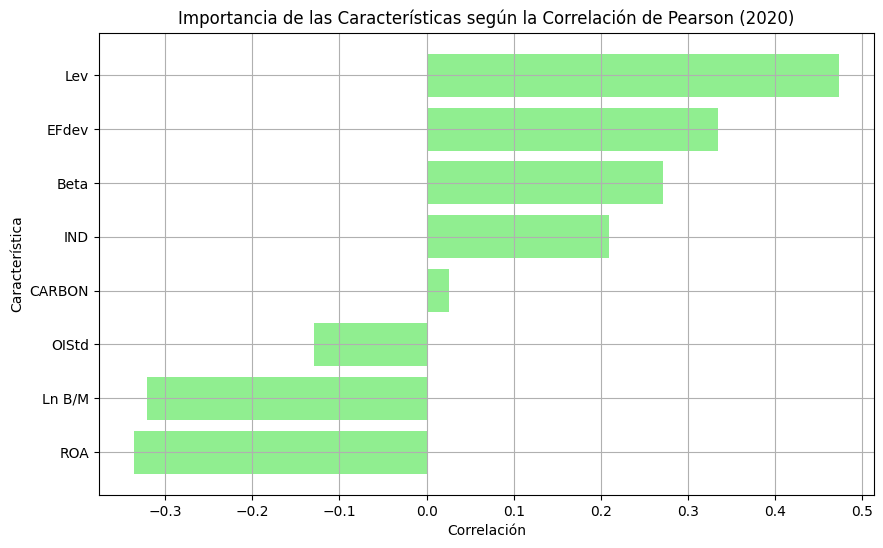

In [ ]:
# Graficar la importancia de las características según la correlación
plt.figure(figsize=(10, 6))
plt.barh(correlation.index, correlation.values, color='lightgreen')
plt.xlabel('Correlación')
plt.ylabel('Característica')
plt.title('Importancia de las Características según la Correlación de Pearson (2020)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características con mayor correlación aparezcan primero
plt.grid('True')
plt.show()

In [ ]:
# Enfoque no lineal: Random Forest
from sklearn.ensemble import RandomForestRegressor
X = df_2020.iloc[:-1, 4:12]
y = df_2020.iloc[:-1, 3]


# Entrena un modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extrae la importancia de las características
feature_importances = model.feature_importances_

# Crea un DataFrame para mostrar la importancia
importance_df = pd.DataFrame({'Característica': X.columns, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

print("Importancia de las características según el modelo de Random Forest:")
print(importance_df)

Importancia de las características según el modelo de Random Forest:
  Característica  Importancia
3            Lev     0.196182
0         CARBON     0.159360
1           Beta     0.145643
6            ROA     0.143243
2         Ln B/M     0.142291
5          EFdev     0.121491
4          OIStd     0.076488
7            IND     0.015303


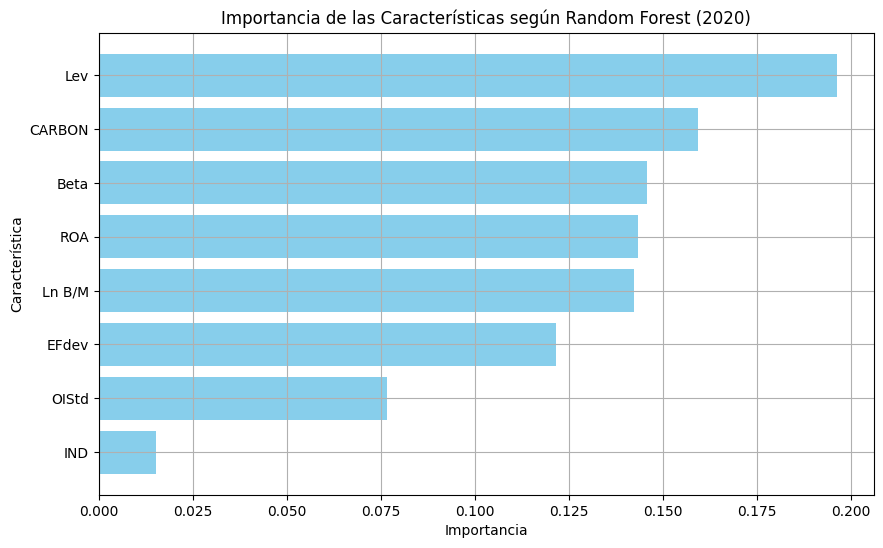

In [ ]:
# Gráfica de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características según Random Forest (2020)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes aparezcan primero
plt.grid('True')
plt.show()

De igual forma, podemos percatarnos que las magnitudes de la importancia de ciertos índices aumentaron considerablemente.

# 2021

In [ ]:
# Carga de datos
df_2021 = pd.read_csv('2021_data.csv')
df_2021 = df_2021.drop('Unnamed: 0', axis=1)
df_2021 = df_2021.iloc[:-1, :]
df_2021.head()

,Nombre,Codigo,Partic en\nIndice Prec Y Cotiz,CoE,CARBON,Beta,Ln B/M,Lev,OIStd,EFdev,ROA,IND,YD 2022,YD 2021,YD 2020,YD 2019,YD 2018
0,Fomento Econ Mex,FEMSAUBD,10.020,0.1037,2.7675,0.883,0.9575,0.5456,0.00850,0.243859,0.05502,1.0,0.0,1.0,0.0,0.0,0.0
1,America Movil,AMXB,8.890,0.2596,7.9576,0.831,1.2574,0.7313,0.01590,0.301226,0.13030,0.0,0.0,1.0,0.0,0.0,0.0
2,GMexico,GMEXICOB,8.850,0.1788,6.9340,1.115,0.7545,0.4337,0.02948,0.085841,0.15296,1.0,0.0,1.0,0.0,0.0,0.0
3,Wal Mart de Mexico,WALMEX,8.430,0.0787,1.9156,0.606,1.9668,0.5287,0.02284,0.023205,0.12197,0.0,0.0,1.0,0.0,0.0,0.0
4,Cemex,CEMEXCPO,6.710,0.2360,145.0949,1.392,0.0242,0.6146,0.03039,0.239240,0.02918,1.0,0.0,1.0,0.0,0.0,0.0


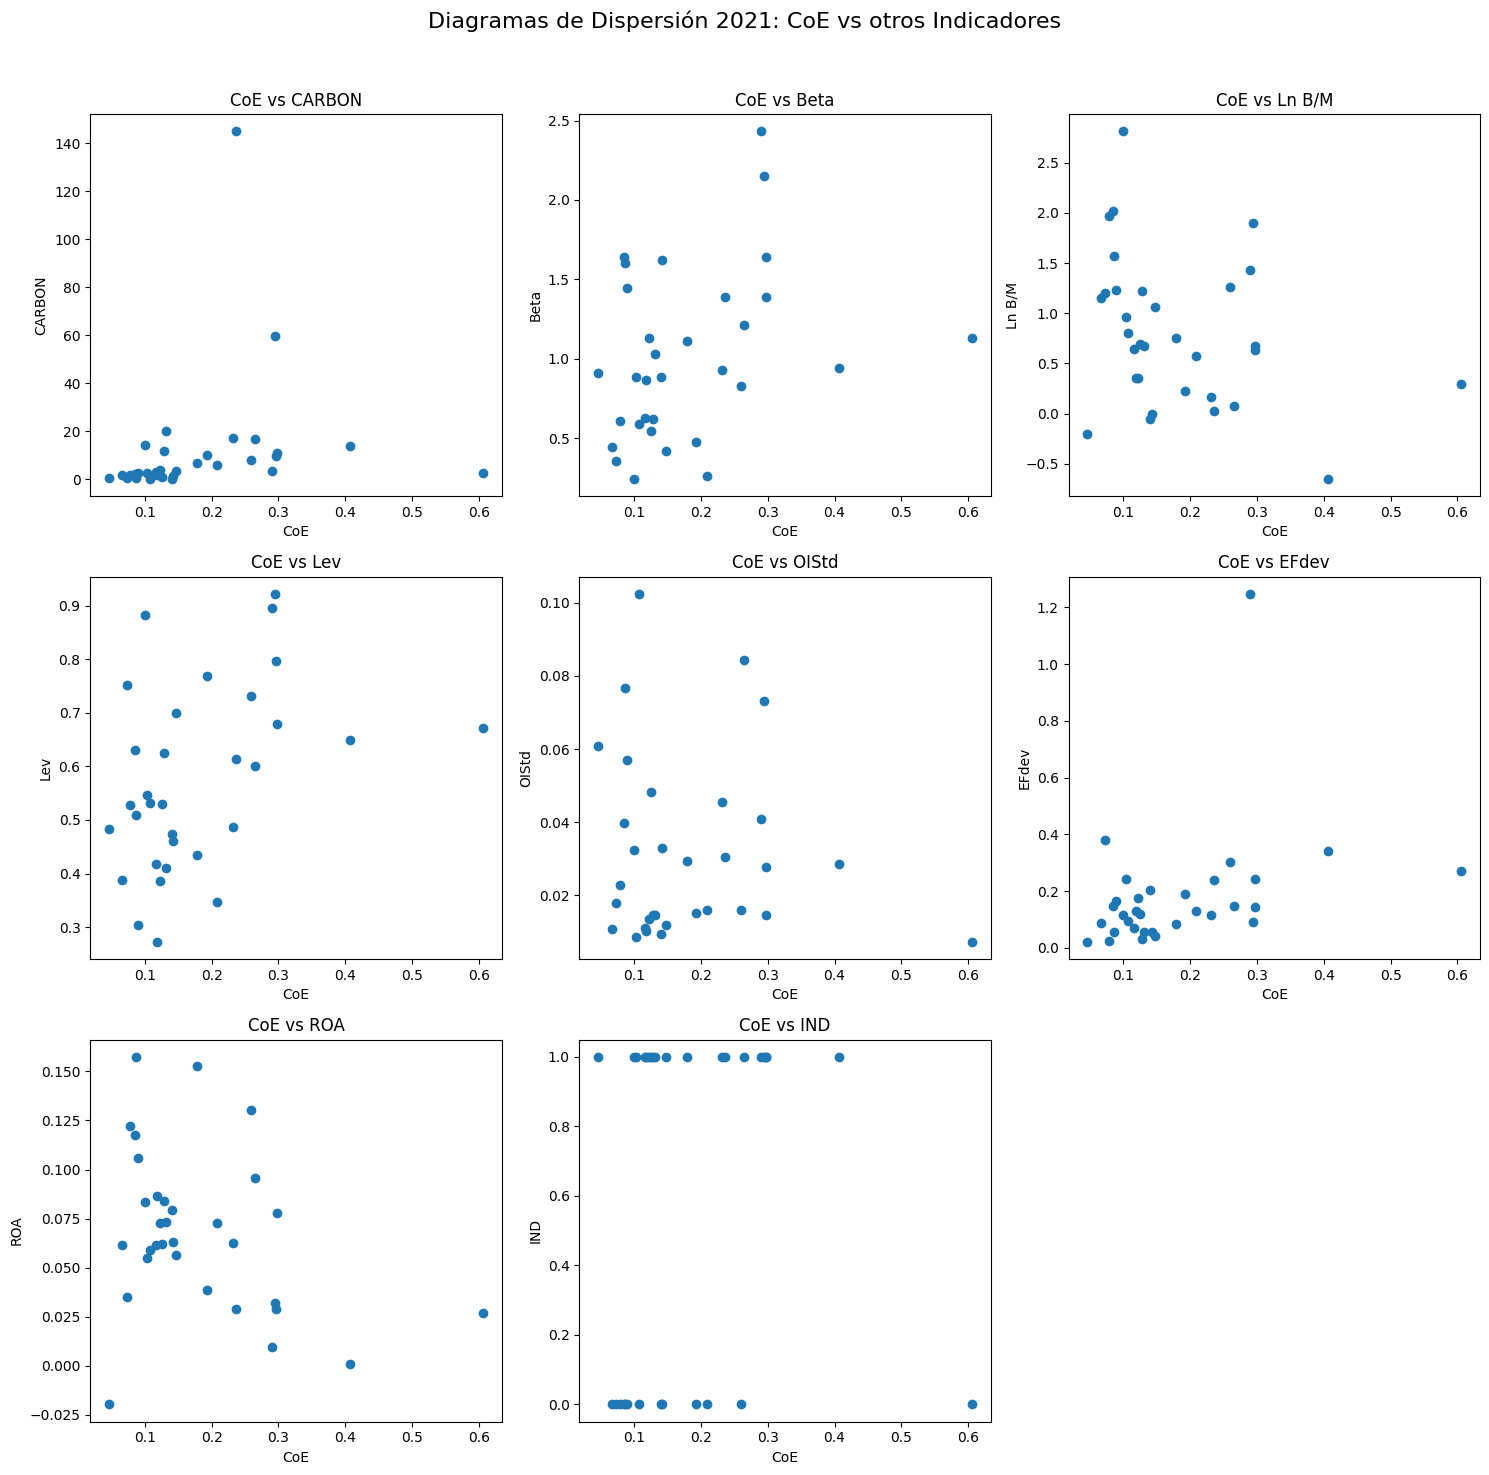

In [ ]:
# Diagramas de dispersión
# Asigna la columna base para los diagramas de dispersión
x = df_2021.iloc[:, 3]

# Configura la figura y los subplots en una cuadrícula de 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Diagramas de Dispersión 2021: CoE vs otros Indicadores', fontsize=16)

# Recorre las columnas 4 a 12 para crear cada subplot
for i, ax in enumerate(axes.flat):
    if i < 8:  # Solo hay 8 columnas en el rango 4:12
        y = df_2021.iloc[:, i + 4]
        ax.scatter(x, y)
        ax.set_title(f'CoE vs {df_2021.columns[i + 4]}')
        ax.set_xlabel(f'{df_2021.columns[3]}')
        ax.set_ylabel(f'{df_2021.columns[i + 4]}')
    else:
        ax.axis('off')  # Apaga cualquier subplot adicional

# Ajusta el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Enfoque lineal: A partir de la correlación
# Calcula la correlación de cada característica con la columna objetivo
correlation = df_2021.iloc[:, 4:12].corrwith(df_2021.iloc[:, 3])

# Ordena las características según la magnitud de su correlación
correlation = correlation.sort_values(ascending=False)
print("Correlación de las características con la variable objetivo:")
print(correlation)

Correlación de las características con la variable objetivo:
Lev       0.410496
EFdev     0.350831
Beta      0.328496
CARBON    0.210371
IND       0.115846
OIStd    -0.094242
Ln B/M   -0.318034
ROA      -0.332134
dtype: float64


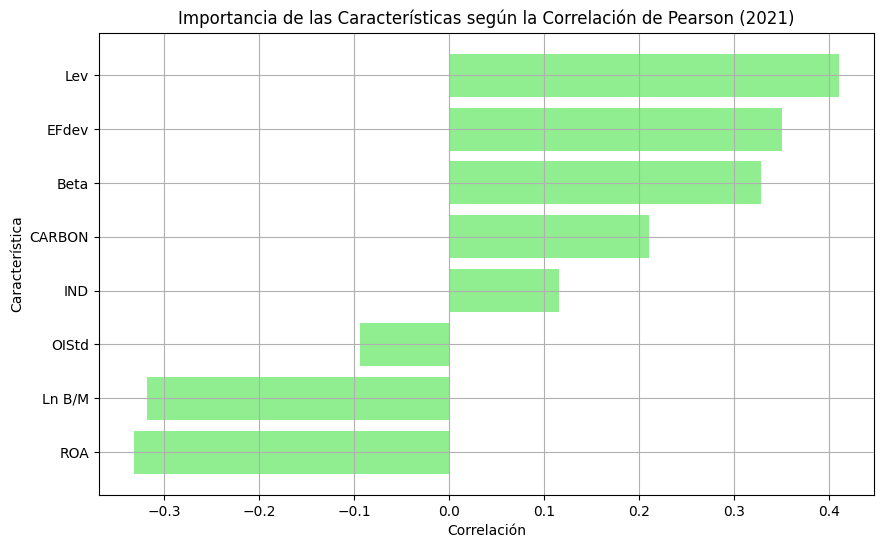

In [ ]:
# Graficar la importancia de las características según la correlación
plt.figure(figsize=(10, 6))
plt.barh(correlation.index, correlation.values, color='lightgreen')
plt.xlabel('Correlación')
plt.ylabel('Característica')
plt.title('Importancia de las Características según la Correlación de Pearson (2021)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características con mayor correlación aparezcan primero
plt.grid('True')
plt.show()

In [ ]:
# Enfoque no lineal: Random Forest
from sklearn.ensemble import RandomForestRegressor
X = df_2021.iloc[:-1, 4:12]
y = df_2021.iloc[:-1, 3]

# Entrena un modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extrae la importancia de las características
feature_importances = model.feature_importances_

# Crea un DataFrame para mostrar la importancia
importance_df = pd.DataFrame({'Característica': X.columns, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

print("Importancia de las características según el modelo de Random Forest:")
print(importance_df)

Importancia de las características según el modelo de Random Forest:
  Característica  Importancia
0         CARBON     0.284209
4          OIStd     0.193240
5          EFdev     0.172152
6            ROA     0.157689
3            Lev     0.061834
1           Beta     0.061494
2         Ln B/M     0.055182
7            IND     0.014200


Aumentó la magnitud de la importancia de Lev con relación al año 2020.

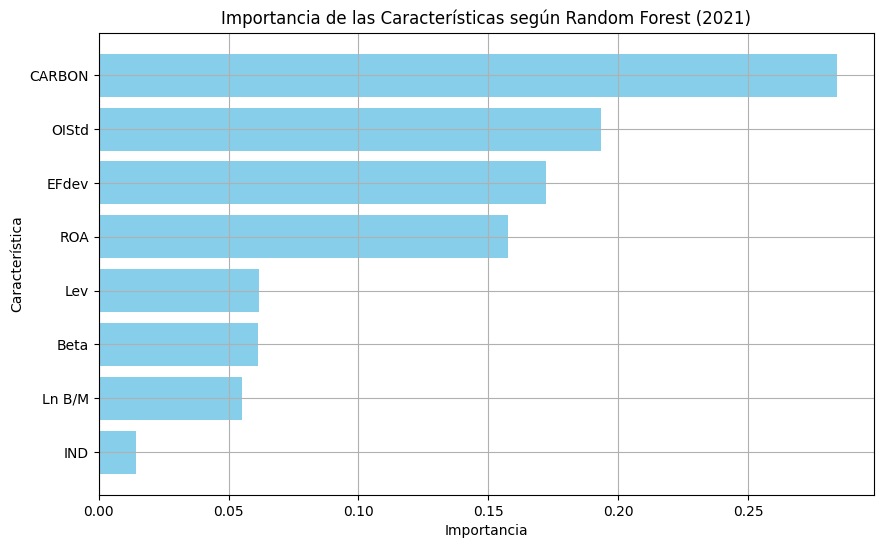

In [ ]:
# Gráfica de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características según Random Forest (2021)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes aparezcan primero
plt.grid('True')
plt.show()

# 2022

In [ ]:
# Carga de datos
df_2022 = pd.read_csv('2022_data.csv')
df_2022 = df_2022.drop('Unnamed: 0', axis=1)
df_2022 = df_2022.iloc[:-1, :]
df_2022.head()

,Nombre,Codigo,Partic en\nIndice Prec Y Cotiz,CoE,CARBON,Beta,Ln B/M,Lev,OIStd,EFdev,ROA,IND,YD 2022,YD 2021,YD 2020,YD 2019,YD 2018
0,Fomento Econ Mex,FEMSAUBD,10.020,0.1144,2.9023,0.852,0.9080,0.5771,0.01196,0.054176,0.04711,1.0,1.0,0.0,0.0,0.0,0.0
1,America Movil,AMXB,8.890,0.2778,8.2101,0.853,1.0979,0.7294,0.01664,0.082907,0.04824,0.0,1.0,0.0,0.0,0.0,0.0
2,GMexico,GMEXICOB,8.850,0.1729,7.1166,1.248,0.4614,0.3949,0.06201,0.131672,0.10973,1.0,1.0,0.0,0.0,0.0,0.0
3,Wal Mart de Mexico,WALMEX,8.430,0.0854,1.6283,0.736,1.7776,0.5166,0.02154,0.023410,0.12418,0.0,1.0,0.0,0.0,0.0,0.0
4,Cemex,CEMEXCPO,6.710,0.2795,129.5730,1.352,-0.5814,0.5875,0.03085,0.154937,0.03158,1.0,1.0,0.0,0.0,0.0,0.0


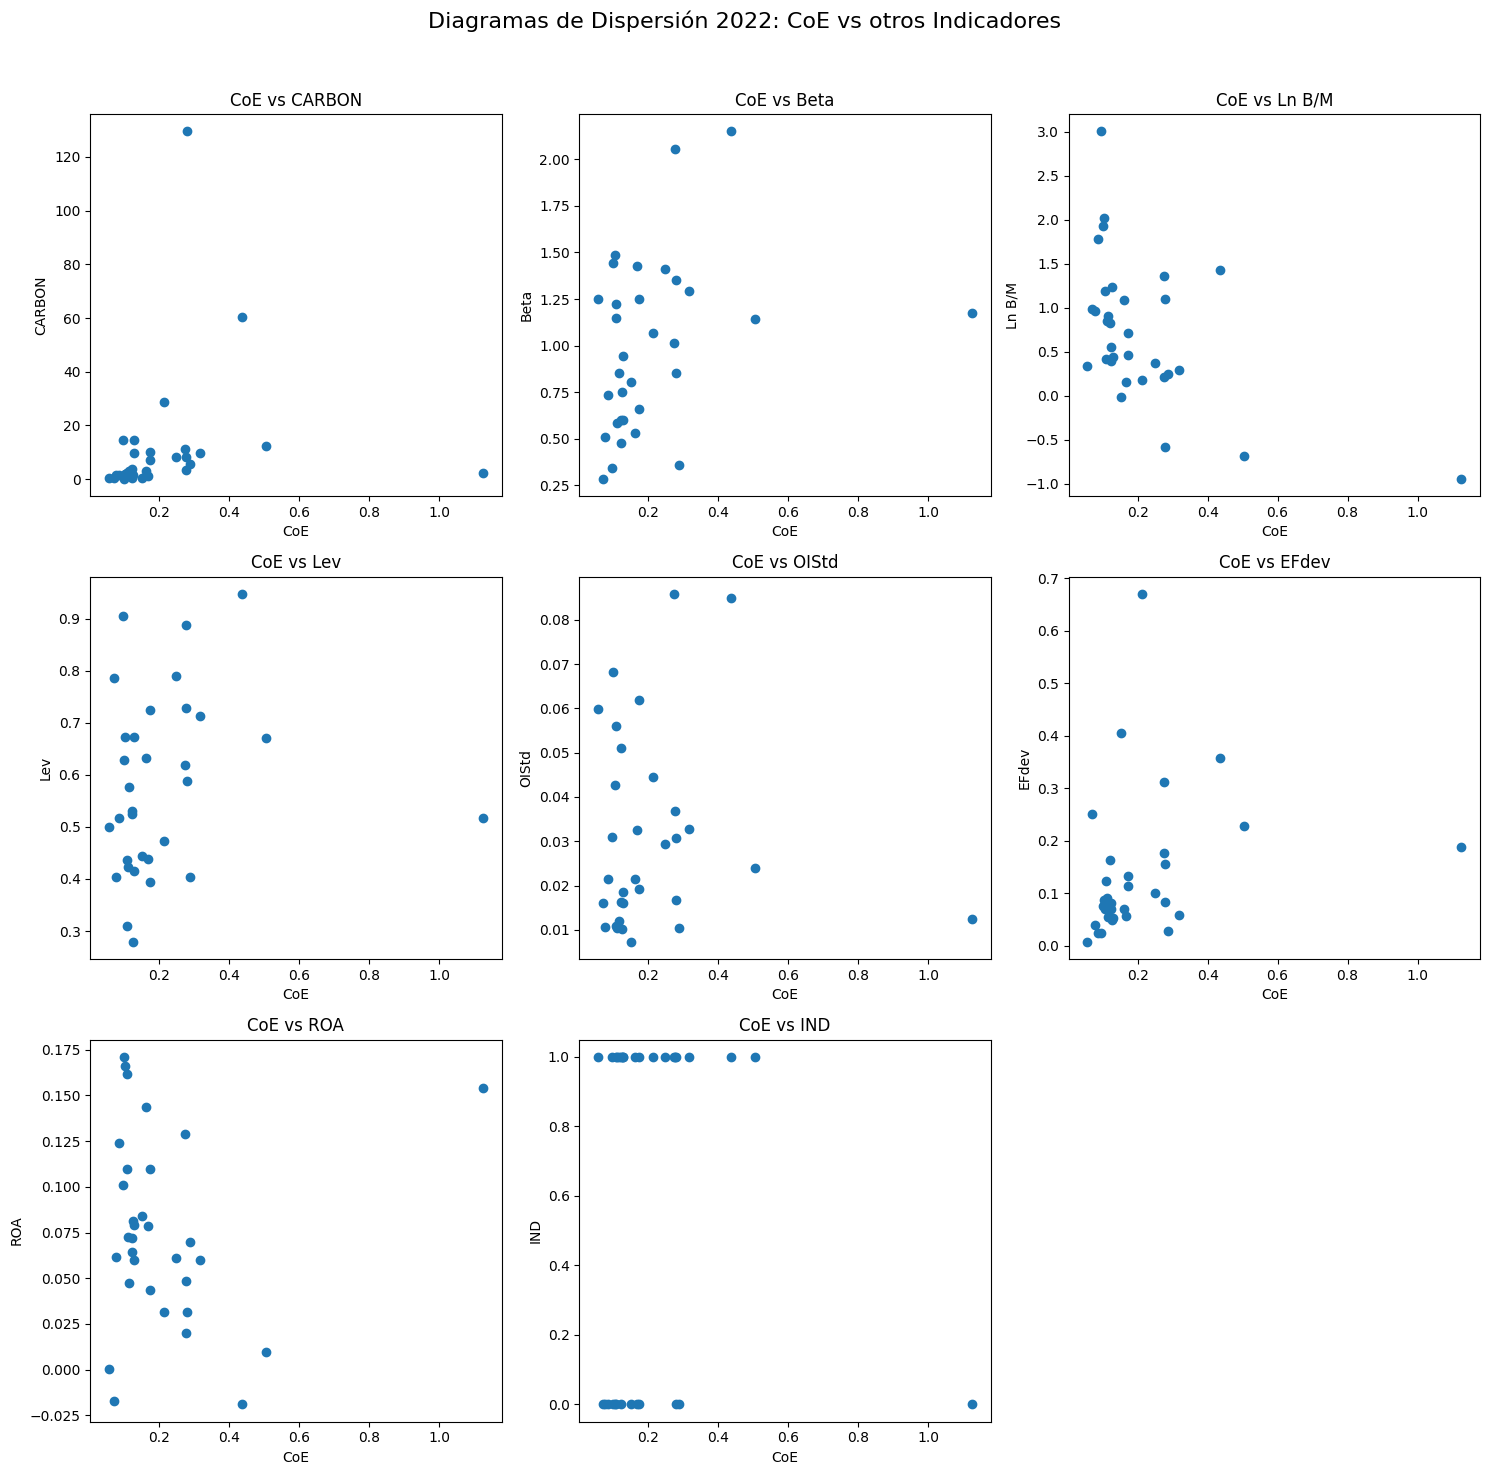

In [ ]:
# Diagramas de dispersión
# Asigna la columna base para los diagramas de dispersión
x = df_2022.iloc[:, 3]

# Configura la figura y los subplots en una cuadrícula de 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Diagramas de Dispersión 2022: CoE vs otros Indicadores', fontsize=16)

# Recorre las columnas 4 a 12 para crear cada subplot
for i, ax in enumerate(axes.flat):
    if i < 8:  # Solo hay 8 columnas en el rango 4:12
        y = df_2022.iloc[:, i + 4]
        ax.scatter(x, y)
        ax.set_title(f'CoE vs {df_2022.columns[i + 4]}')
        ax.set_xlabel(f'{df_2022.columns[3]}')
        ax.set_ylabel(f'{df_2022.columns[i + 4]}')
    else:
        ax.axis('off')  # Apaga cualquier subplot adicional

# Ajusta el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Enfoque lineal: A partir de la correlación
# Calcula la correlación de cada característica con la columna objetivo
correlation = df_2022.iloc[:, 4:12].corrwith(df_2022.iloc[:, 3])

# Ordena las características según la magnitud de su correlación
correlation = correlation.sort_values(ascending=False)
print("Correlación de las características con la variable objetivo:")
print(correlation)

Correlación de las características con la variable objetivo:
Beta      0.302508
EFdev     0.246505
CARBON    0.166901
Lev       0.160495
ROA       0.028337
OIStd    -0.008925
IND      -0.038834
Ln B/M   -0.520492
dtype: float64


Cambió el orden de importancia con relación al 2021.

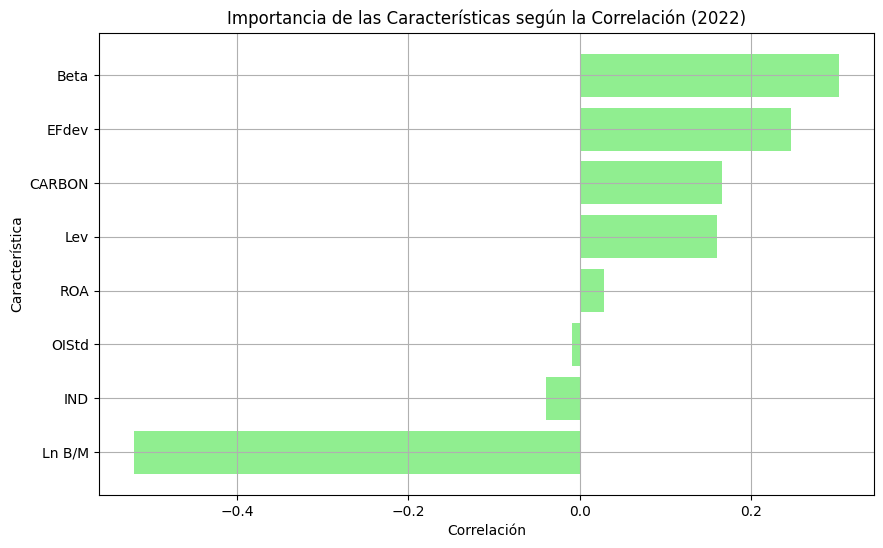

In [ ]:
# Graficar la importancia de las características según la correlación
plt.figure(figsize=(10, 6))
plt.barh(correlation.index, correlation.values, color='lightgreen')
plt.xlabel('Correlación')
plt.ylabel('Característica')
plt.title('Importancia de las Características según la Correlación (2022)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características con mayor correlación aparezcan primero
plt.grid('True')
plt.show()

In [ ]:
# Enfoque no lineal: Random Forest
from sklearn.ensemble import RandomForestRegressor
X = df_2022.iloc[:-1, 4:12]
y = df_2022.iloc[:-1, 3]

# Entrena un modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extrae la importancia de las características
feature_importances = model.feature_importances_

# Crea un DataFrame para mostrar la importancia
importance_df = pd.DataFrame({'Característica': X.columns, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

print("Importancia de las características según el modelo de Random Forest:")
print(importance_df)

Importancia de las características según el modelo de Random Forest:
  Característica  Importancia
2         Ln B/M     0.692029
0         CARBON     0.155837
6            ROA     0.063658
1           Beta     0.034364
5          EFdev     0.023169
3            Lev     0.017659
4          OIStd     0.007837
7            IND     0.005448


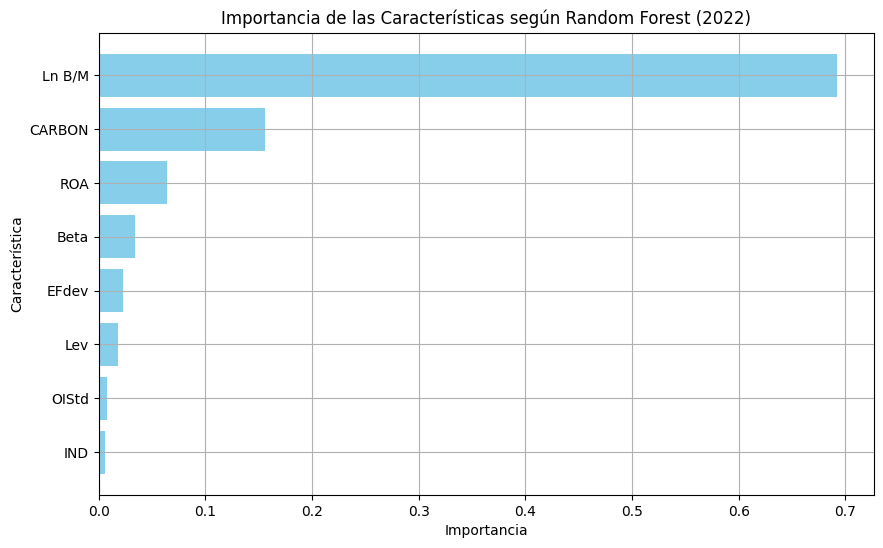

In [ ]:
# Gráfica de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características según Random Forest (2022)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes aparezcan primero
plt.grid('True')
plt.show()

# General

In [ ]:
df_combined = pd.concat([df_2018.iloc[:-1,:], df_2019.iloc[:-1,:],
                         df_2020.iloc[:-1,:], df_2021.iloc[:-1,:],
                         df_2022.iloc[:-1,:]], ignore_index=True)
df_combined.head()

,Nombre,Codigo,Partic en\nIndice Prec Y Cotiz,CoE,CARBON,Beta,Ln B/M,Lev,OIStd,EFdev,ROA,IND,YD 2022,YD 2021,YD 2020,YD 2019,YD 2018
0,Fomento Econ Mex,FEMSAUBD,10.020,0.0934,3.3200,0.848,1.0362,0.4178,0.00816,0.120899,0.05621,1.0,0.0,0.0,0.0,0.0,1.0
1,America Movil,AMXB,8.890,0.2526,11.3228,0.772,1.4497,0.8280,0.01969,0.201411,0.03668,0.0,0.0,0.0,0.0,0.0,1.0
2,GMexico,GMEXICOB,8.850,0.1737,7.6005,1.131,0.2807,0.4746,0.03505,0.167937,0.06407,1.0,0.0,0.0,0.0,0.0,1.0
3,Wal Mart de Mexico,WALMEX,8.430,0.0864,1.8447,0.806,1.6660,0.4620,0.01927,0.014419,0.12448,0.0,0.0,0.0,0.0,0.0,1.0
4,Cemex,CEMEXCPO,6.710,0.2587,176.7534,1.286,-0.2815,0.6027,0.01478,0.104979,0.01973,1.0,0.0,0.0,0.0,0.0,1.0


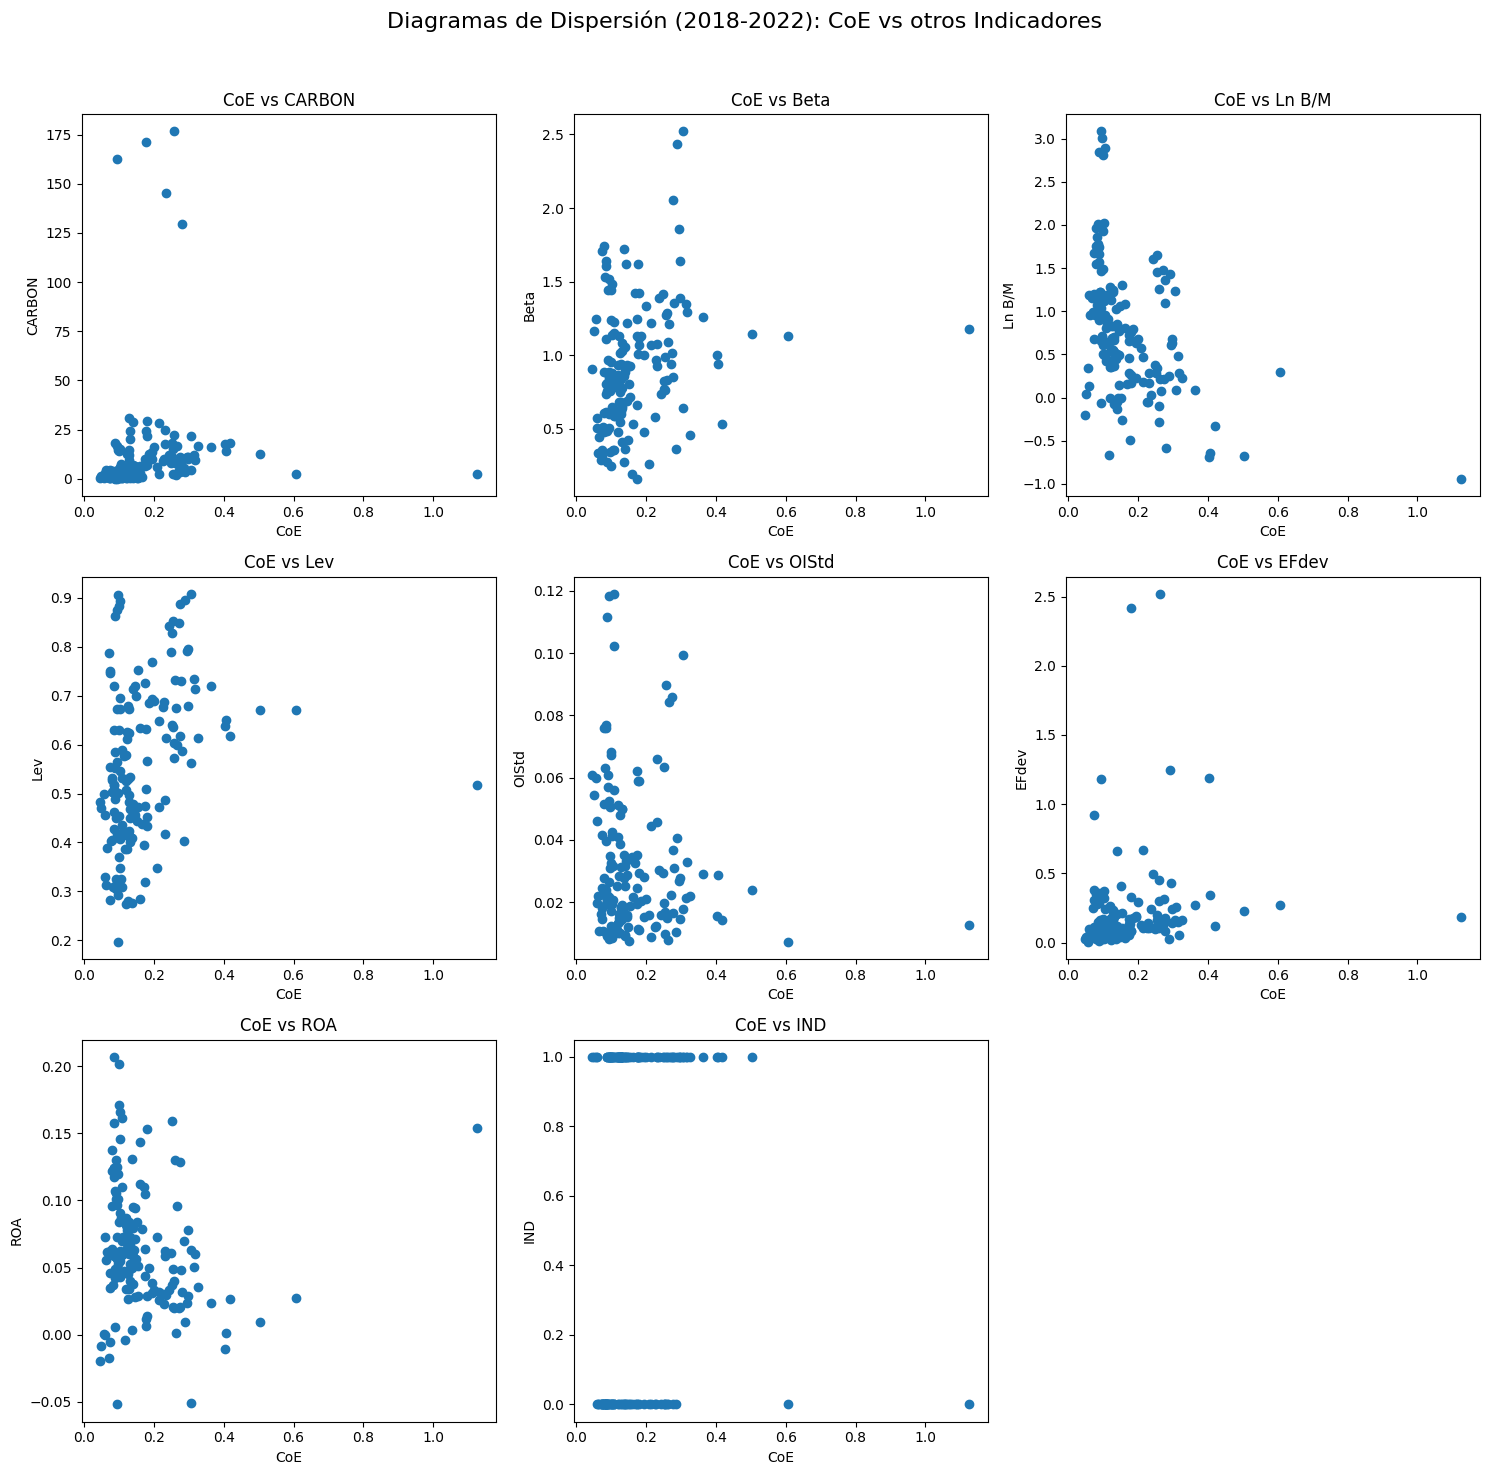

In [ ]:
# Diagramas de dispersión
# Asigna la columna base para los diagramas de dispersión
x = df_combined.iloc[:, 3]

# Configura la figura y los subplots en una cuadrícula de 3x3
fig, axes = plt.subplots(3, 3, figsize=(15, 15))
fig.suptitle('Diagramas de Dispersión (2018-2022): CoE vs otros Indicadores', fontsize=16)

# Recorre las columnas 4 a 12 para crear cada subplot
for i, ax in enumerate(axes.flat):
    if i < 8:  # Solo hay 8 columnas en el rango 4:12
        y = df_combined.iloc[:, i + 4]
        ax.scatter(x, y)
        ax.set_title(f'CoE vs {df_combined.columns[i + 4]}')
        ax.set_xlabel(f'{df_combined.columns[3]}')
        ax.set_ylabel(f'{df_combined.columns[i + 4]}')
    else:
        ax.axis('off')  # Apaga cualquier subplot adicional

# Ajusta el espaciado entre subplots
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Enfoque lineal: A partir de la correlación
# Calcula la correlación de cada característica con la columna objetivo
correlation = df_combined.iloc[:, 4:12].corrwith(df_combined.iloc[:, 3])

# Ordena las características según la magnitud de su correlación
correlation = correlation.sort_values(ascending=False)
print("Correlación de las características con la variable objetivo:")
print(correlation)

Correlación de las características con la variable objetivo:
Lev       0.295419
Beta      0.240748
EFdev     0.160656
CARBON    0.124085
IND       0.083234
ROA      -0.121968
OIStd    -0.126220
Ln B/M   -0.434568
dtype: float64


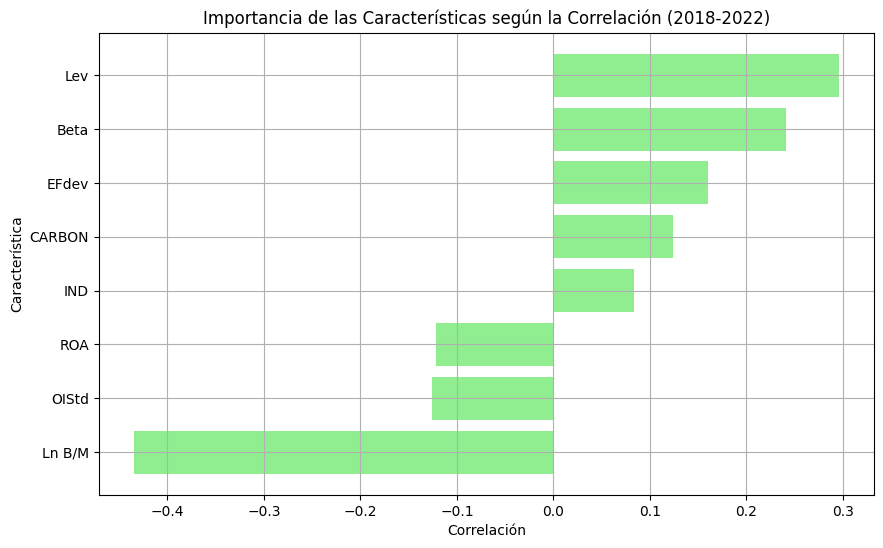

In [ ]:
# Graficar la importancia de las características según la correlación
plt.figure(figsize=(10, 6))
plt.barh(correlation.index, correlation.values, color='lightgreen')
plt.xlabel('Correlación')
plt.ylabel('Característica')
plt.title('Importancia de las Características según la Correlación (2018-2022)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características con mayor correlación aparezcan primero
plt.grid('True')
plt.show()

In [ ]:
# Enfoque no lineal: Random Forest
from sklearn.ensemble import RandomForestRegressor
X = df_combined.iloc[:-1, 4:12]
y = df_combined.iloc[:-1, 3]

# Entrena un modelo de Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X, y)

# Extrae la importancia de las características
feature_importances = model.feature_importances_

# Crea un DataFrame para mostrar la importancia
importance_df = pd.DataFrame({'Característica': X.columns, 'Importancia': feature_importances})
importance_df = importance_df.sort_values(by='Importancia', ascending=False)

print("Importancia de las características según el modelo de Random Forest:")
print(importance_df)

Importancia de las características según el modelo de Random Forest:
  Característica  Importancia
2         Ln B/M     0.450189
0         CARBON     0.158926
4          OIStd     0.123237
3            Lev     0.120628
1           Beta     0.051659
5          EFdev     0.046458
6            ROA     0.041068
7            IND     0.007834


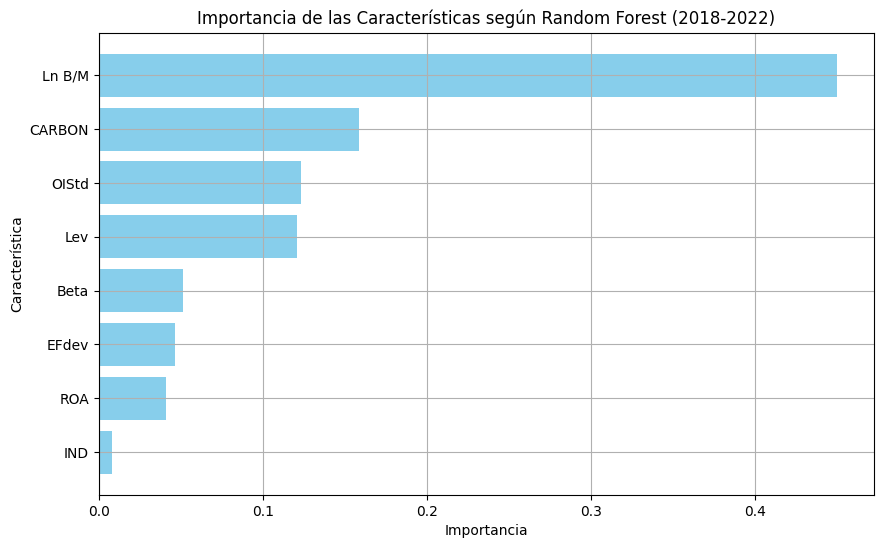

In [ ]:
# Gráfica de la importancia de las características
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Característica'], importance_df['Importancia'], color='skyblue')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las Características según Random Forest (2018-2022)')
plt.gca().invert_yaxis()  # Invierte el eje y para que las características más importantes aparezcan primero
plt.grid('True')
plt.show()